# Design with explicit Formula

This tutorial notebook shows how to setup a D-optimal design with BoFire while providing an explicit formula and not just one of the four available keywords `linear`, `linear-and-interaction`, `linear-and-quadratic`, `fully-quadratic`.

Make sure that `cyipopt`is installed. The recommend way is the installation via conda `conda install -c conda-forge cyipopt`.

## Imports

In [ ]:
import bofire.strategies.api as strategies
from bofire.data_models.api import Domain, Inputs
from bofire.data_models.features.api import ContinuousInput
from bofire.data_models.strategies.api import DoEStrategy
from bofire.data_models.strategies.doe import DOptimalityCriterion
from bofire.utils.doe import get_confounding_matrix

## Setup of the problem

In [ ]:
input_features = Inputs(
    features=[
        ContinuousInput(key="a", bounds=(0, 5)),
        ContinuousInput(key="b", bounds=(40, 800)),
        ContinuousInput(key="c", bounds=(80, 180)),
        ContinuousInput(key="d", bounds=(200, 800)),
    ],
)
domain = Domain(inputs=input_features)

## Definition of the formula for which the optimal points should be found

In [ ]:
model_type = "a + {a**2} + b + c + d + a:b + a:c + a:d + b:c + b:d + c:d"
model_type

'a + {a**2} + b + c + d + a:b + a:c + a:d + b:c + b:d + c:d'

## Find D-optimal Design

In [ ]:
data_model = DoEStrategy(
    domain=domain,
    criterion=DOptimalityCriterion(formula=model_type),
    ipopt_options={"max_iter": 100, "print_level": 0},
)
strategy = strategies.map(data_model=data_model)
design = strategy.ask(17)
design

Tried to set Option: disp. It is not a valid option. Please check the list of available options.


TypeError: Error while assigning an option

## Analyze Confounding

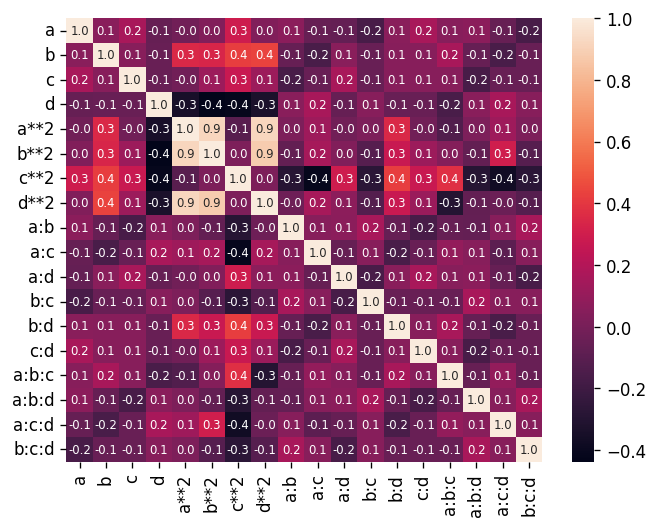

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


matplotlib.rcParams["figure.dpi"] = 120

m = get_confounding_matrix(
    domain.inputs,
    design=design,
    interactions=[2, 3],
    powers=[2],
)

sns.heatmap(m, annot=True, annot_kws={"fontsize": 7}, fmt="2.1f")
plt.show()